# Project: Investigating a Healthcare Dataset from Kaggle

Data Source --> https://www.kaggle.com/joniarroba/noshowappointments/data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [6]:
import pandas as pd
import seaborn as sns
import datetime
sns.set(style="darkgrid")
import numpy as np
import matplotlib as mp
%matplotlib inline
import datetime as dt
import pylab

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()
df_orig = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing data. The `ScheduledDay` and `AppointmentDay` columns are objects and could be converted to datetime types. The `No-show` columns could be turned into a dummy variable instead of as a `yes/no` metric to match the other variables. 

### Data Cleaning 

In [8]:
df['patientid'] = df['PatientId'].astype('int64')
df['apptid'] = df['AppointmentID'].astype('int64')
df['gender'] = df['Gender']
df['scheduledday'] = pd.to_datetime(df['ScheduledDay'])
df['appointmentday'] = pd.to_datetime(df['AppointmentDay'])
df['age'] = df['Age']
df['neighborhood'] = df['Neighbourhood']
df['scholarship'] = df['Scholarship'].astype('bool')
df['hypertension'] = df['Hipertension'].astype('bool')
df['diabetes'] = df['Diabetes'].astype('bool')
df['alcoholism'] = df['Alcoholism'].astype('bool')
df['handicap'] = df['Handcap'].astype('bool')
df['sms_received'] = df['SMS_received'].astype('bool')
df['show'] = df['No-show']

In [9]:
df = df.drop(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
        'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'], axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null int64
apptid            110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighborhood      110527 non-null object
scholarship       110527 non-null bool
hypertension      110527 non-null bool
diabetes          110527 non-null bool
alcoholism        110527 non-null bool
handicap          110527 non-null bool
sms_received      110527 non-null bool
show              110527 non-null object
dtypes: bool(6), datetime64[ns](2), int64(3), object(3)
memory usage: 7.4+ MB


,patientid,apptid,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,No


<a id='eda'></a>
## Exploratory Data Analysis

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

### Research Question 1: What is the appointment scheduling threshold that will make it most likely to their appointments for Bolsa Familia Families?

In [10]:
# Creating date diff to make it clear how many days there are betweeen when the appointment was scheduled and the appointment date.
df = df
df['scheduledday1'] = df['scheduledday'].dt.date
df['appointmentday1'] = df['appointmentday'].dt.date
df['date_diff'] = (df['appointmentday1'] - df['scheduledday1']).astype('timedelta64[D]')

In [11]:
# Filter for only bolsa familia (scholarship) families
df1 = df.query('scholarship == True')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10861 entries, 12 to 110482
Data columns (total 17 columns):
patientid          10861 non-null int64
apptid             10861 non-null int64
gender             10861 non-null object
scheduledday       10861 non-null datetime64[ns]
appointmentday     10861 non-null datetime64[ns]
age                10861 non-null int64
neighborhood       10861 non-null object
scholarship        10861 non-null bool
hypertension       10861 non-null bool
diabetes           10861 non-null bool
alcoholism         10861 non-null bool
handicap           10861 non-null bool
sms_received       10861 non-null bool
show               10861 non-null object
scheduledday1      10861 non-null object
appointmentday1    10861 non-null object
date_diff          10861 non-null float64
dtypes: bool(6), datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 1.1+ MB


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


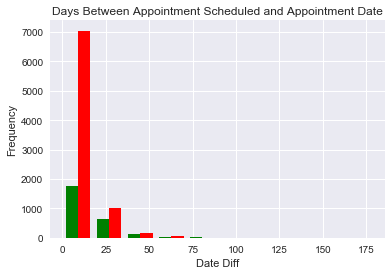

In [12]:
#plot histogram
mp.pyplot.hist([df1.query('show == "Yes"')['date_diff'], df1.query('show == "No"')['date_diff']], color=['g','r'])
pylab.legend()
pylab.xlabel('Date Diff')
pylab.ylabel('Frequency')
pylab.title('Days Between Appointment Scheduled and Appointment Date')
pylab.show()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


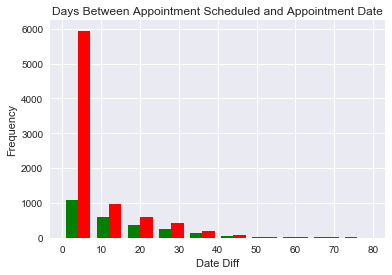

In [13]:
# This is great, but we want to get a lot more granular than this. 
a = df1.query('show == "Yes"')['date_diff']
b = df1.query('show == "No"')['date_diff']
mp.pyplot.hist([a, b], color=['g','r'], range = (0,80))
pylab.legend()
pylab.xlabel('Date Diff')
pylab.ylabel('Frequency')
pylab.title('Days Between Appointment Scheduled and Appointment Date')
pylab.show()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


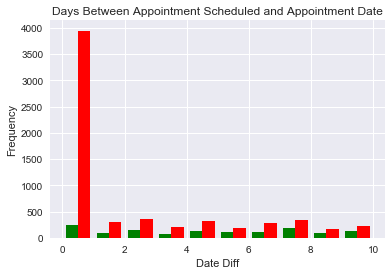

In [14]:
# Let's dig into the gap between 0-10
mp.pyplot.hist([a, b], color=['g','r'], range = (0,10))
pylab.legend()
pylab.title('Days Between Appointment Scheduled and Appointment Date')
pylab.ylabel('Frequency')
pylab.xlabel('Date Diff')
pylab.show()

While overall we see that more Bolsa Familia families are no-shows to their doctor appointments, this is especially true for same-day appointments.

### Research Question 2: What is the appointment scheduling threshold that will make it most likely to their appointments for non-Bolsa Familia families?

In [15]:
df2 = df.query('scholarship == False')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99666 entries, 0 to 110526
Data columns (total 17 columns):
patientid          99666 non-null int64
apptid             99666 non-null int64
gender             99666 non-null object
scheduledday       99666 non-null datetime64[ns]
appointmentday     99666 non-null datetime64[ns]
age                99666 non-null int64
neighborhood       99666 non-null object
scholarship        99666 non-null bool
hypertension       99666 non-null bool
diabetes           99666 non-null bool
alcoholism         99666 non-null bool
handicap           99666 non-null bool
sms_received       99666 non-null bool
show               99666 non-null object
scheduledday1      99666 non-null object
appointmentday1    99666 non-null object
date_diff          99666 non-null float64
dtypes: bool(6), datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 9.7+ MB


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


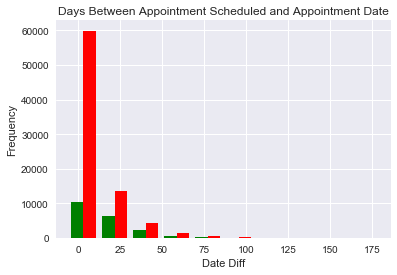

In [16]:
a = df2.query('show == "Yes"')['date_diff']
b = df2.query('show == "No"')['date_diff']
mp.pyplot.hist([a , b], color=['g','r'])
pylab.legend()
pylab.title('Days Between Appointment Scheduled and Appointment Date')
pylab.ylabel('Frequency')
pylab.xlabel('Date Diff')
pylab.show()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


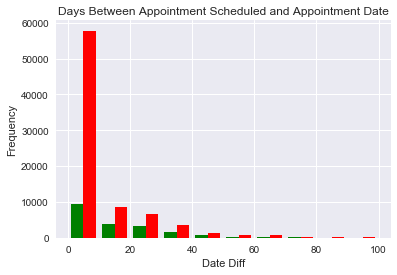

In [17]:
mp.pyplot.hist([a , b], color=['g','r'], range = (0,100))
pylab.legend()
pylab.xlabel('Date Diff')
pylab.ylabel('Frequency')
pylab.title('Days Between Appointment Scheduled and Appointment Date')
pylab.show()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


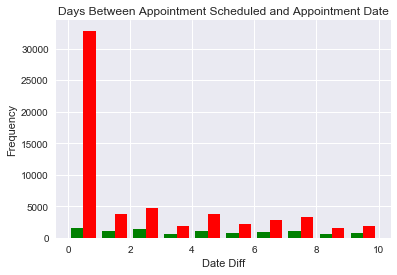

In [18]:
# No one shows up to appointments 80 days away. 
mp.pyplot.hist([a , b], color=['g','r'], range = (0,10))
pylab.legend()
pylab.xlabel('Date Diff')
pylab.ylabel('Frequency')
pylab.title('Days Between Appointment Scheduled and Appointment Date')
pylab.show()

## Research Question 3: Is diabetes more present in older folks? 

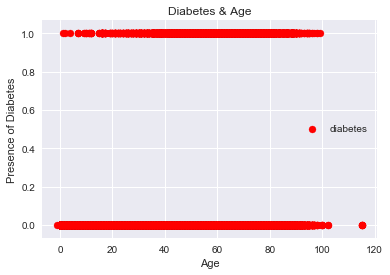

In [19]:
mp.pyplot.scatter(df['age'], df['diabetes'], color=['r'])
pylab.legend()
pylab.xlabel('Age')
pylab.ylabel('Presence of Diabetes')
pylab.title('Diabetes & Age')
pylab.show()

We can see that there are far fewer individuals with diabetes under age 17 than there are older. 

## Research Question 4: At what age do we start seeing alcoholism?

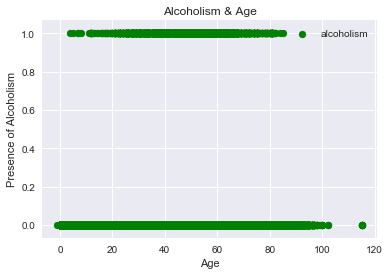

In [20]:
mp.pyplot.scatter(df['age'], df['alcoholism'], color=['g'])
pylab.legend()
pylab.xlabel('Age')
pylab.ylabel('Presence of Alcoholism')
pylab.title('Alcoholism & Age')
pylab.show()

Alcoholics are not at the age extremes of the dataset, likely because they don't start drinking as children and don't live to be as old as their non-alcoholic peers. 

## Research Question 5: What are the No-Show counts by Booking Duration?

Text(0.5,0,'Booking Duration in Hours')

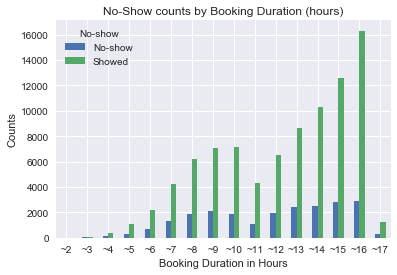

In [21]:
temp_data = df_orig
temp_data['No-show'] = temp_data['No-show'].map({'Yes' : 'No-show', 'No' : 'Showed'})
def convert_date(x):
    return datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ') # we translate the string for python
# Convert both date variables to a datetime object in order to perform arithmatic operations easily
temp_data.ScheduledDay = temp_data.ScheduledDay.apply(convert_date)
temp_data.AppointmentDay = temp_data.AppointmentDay.apply(convert_date)
temp_data['BookingDuration'] = temp_data.AppointmentDay-temp_data.ScheduledDay # Calculate duration
# Convert Duration into hour proportions 
temp_data['BookingDuration'] = temp_data['BookingDuration'].apply(lambda x:x.seconds/60/60)
# After looking at temp_data['BookingDuration'].describe()
# you can see that the max duration is 17.84 and min is 2.54 so we will bin 16 spots for plotting
temp_data['BookingDuration'] = pd.cut(temp_data['BookingDuration'], 
                                      [i for i in range(2, 19)], 
                                      labels = ['~{}'.format(i) for i in range(2, 18)])
temp_data.groupby('BookingDuration')['No-show'].value_counts().unstack().plot(kind = 'bar', rot = 0)
pylab.title('No-Show counts by Booking Duration (hours)')
pylab.ylabel('Counts')
pylab.xlabel('Booking Duration in Hours')

## Research Question 6: What are the No-Show Rate by Booking Duration?

Text(0.5,0,'Booking Duration in Hours')

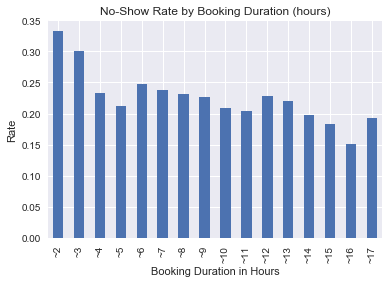

In [22]:
# normalize=True creates the proportions and then we just choose 'No-show' to get the no-show rate
temp_data.groupby('BookingDuration')['No-show'].value_counts(normalize = True).unstack()['No-show'].plot(kind = 'bar')
pylab.title('No-Show Rate by Booking Duration (hours)')
pylab.ylabel('Rate')
pylab.xlabel('Booking Duration in Hours')


<a id='conclusions'></a>
## Conclusions

No one shows up to doctor appointments that are more than 80 days away. In general, we see that people are scheduling appointments further out that Bolsa Familia families (sometimes as high as 100 days away), though those have very, very high no-show rates.  We can see that the BULK of same day appointments across scholarship recipients and non-recipients are no-show. This likely is correlated with the fact that the bulk of the scheduled appointments ARE same day appointments. 

The biggest concern with this data set is the limited sample size. 